In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

C:\Users\Varshini\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Part 1: MAP

Q 1) Generating 50 2D-data points using y=sin(x^2 + 1):
i) The following data is generated using 50 equally spaced input values stored in the array x_arr and the function y=sin(x^2 + 1)
ii) Gaussian noise is added to the output using mean 0 and standard deviation as 0.04.

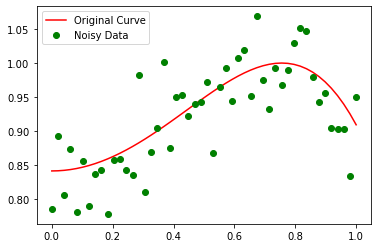

In [60]:
x_arr=np.linspace(0,1,50) #defining the input
#y=0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61
y_sin=np.sin(np.power(x_arr,2)+1) #defining the function

mu=0 #setting the value of mean for the noise to be added
sigma=0.05 #setting the value 
noise=np.random.normal(mu,sigma,len(y_sin))
y_noise=y_sin+noise
N=len(x_arr)
M=5 #Setting M value
mx=np.zeros([N,M+1]) #initializing value of M-dimensional input 
vy=np.zeros([N,1]) #initializing the output data values
for n in range(0,N):
    for m in range(0,M+1):
        mx[n][m]=np.power(x_arr[n],m) #computing the polynomial function and saving in array
    vy[n]=y_noise[n]

plt.plot(x_arr,y_sin,'red',label='Original Curve') #plotting input vs the function output
plt.plot(x_arr,y_noise,'go',label='Noisy Data') #polotting input vs the function output along with the noise added
plt.legend()
plt.show()

In [3]:
N=len(x_arr)
M=50
mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
    for m in range(0,M+1):
        mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise[n]

In [4]:
mu=0
sigma=0.04
noise=np.random.normal(mu,sigma,len(y_sin))
y_noise=y_sin+noise
N=len(x_arr)
M=50
#mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
    
    vy[n]=y_noise[n]

alpha=0.4
beta=(1/np.power(sigma,2))

In [5]:
N=len(x_arr)
M=10
mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
    for m in range(0,M+1):
        mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise[n]

Fitting generated data using MAP:
i) The value of alpha is considered as 0.4
ii) the value of sigma is taken to be 0.04 and thus the value of beta is calculated as (1/sigma^2)
The MAP estimate for w, w_map is then taken as

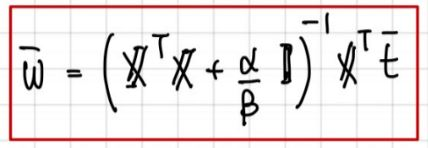


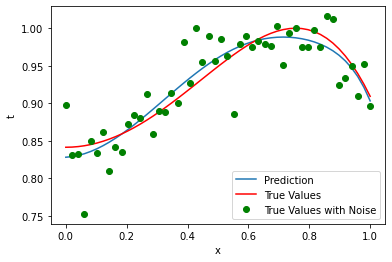

Estimated values of w=  [[ 0.82819202]
 [ 0.02207094]
 [ 0.93485311]
 [-0.65812279]
 [-0.56403817]
 [-0.05740438]
 [ 0.26888646]
 [ 0.32147819]
 [ 0.17799375]
 [-0.05947689]
 [-0.31123823]]
total_absolute_error=  [[0.01327897 0.01266983 0.01176595 0.01060181 0.00921248 0.00763361
  0.00590135 0.00405228 0.0021233  0.00015146 0.00182625 0.00377307
  0.00565281 0.00743012 0.00907087 0.01054253 0.01181466 0.01285934
  0.0136517  0.01417052 0.01439873 0.01432406 0.01393958 0.01324431
  0.01224375 0.01095038 0.00938407 0.00757241 0.00555088 0.00336288
  0.00105946 0.00130105 0.0036539  0.00592907 0.00805284 0.0099499
  0.01154611 0.01277181 0.01356603 0.01388155 0.01369088 0.0129935
  0.01182427 0.01026321 0.00844698 0.00658191 0.00495913 0.00397163
  0.00413381 0.00610341]]

mean_absolute_error=  0.008756688297052782


In [6]:
alpha=0.4
beta=(1/np.power(sigma,2))
mxx=np.dot(mx.T,mx)
imxx=linalg.pinv(mxx+((alpha/beta)*np.identity(M+1)))
tmp=np.dot(imxx,mx.T)
w=np.dot(tmp,vy)
y=np.dot(w.T,mx.T)


plt.plot(x_arr,y.T,label='Prediction')
plt.plot(x_arr,y_sin,'red',label='True Values')
plt.plot(x_arr,y_noise,'go',label='True Values with Noise')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.show()

total_absolute_error=abs(y_sin-y)
mean_absolute_error=np.sum(total_absolute_error)/len(x_arr)

print("Estimated values of w= ",w)
print("total_absolute_error= ",total_absolute_error)
print("\nmean_absolute_error= ",mean_absolute_error)


Q7) Varying values of M and alpha:
i) Alpha values are varied while M value is set to be a constant value of 10
ii) M value is varied while alpha value is set to be a constant value of 0.2
The variations are plotted and observed accordingly

In [7]:
M_vals=[1,2,3,4,5,10,20,50,100] #defining the list of M values
alpha_vals=[0,0.01,0.03,0.05,0.1,0.2,0.4,0.5,1,5,10,100,500,1000] #defining the list of alpha values
error_M=[] 
error_alpha=[]

Varying alpha and keeping M constant:

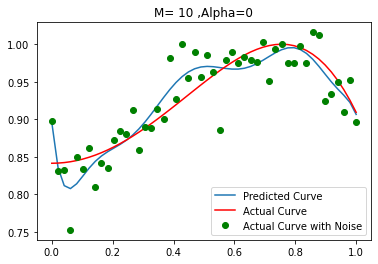

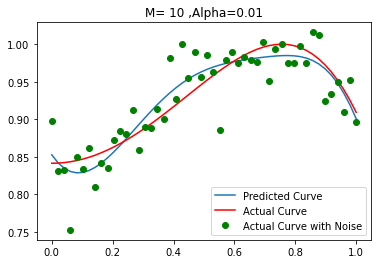

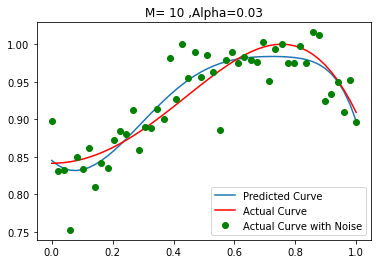

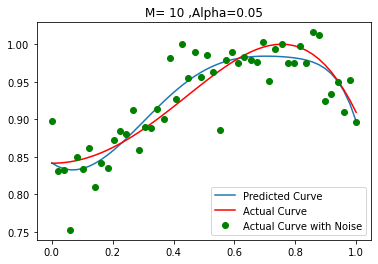

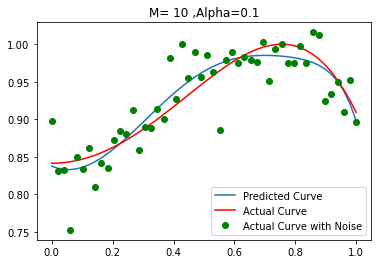

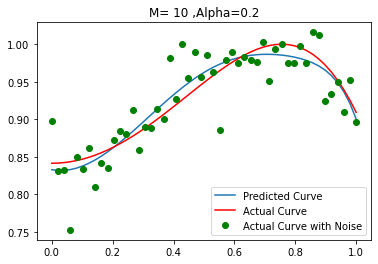

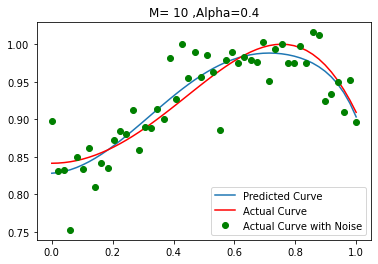

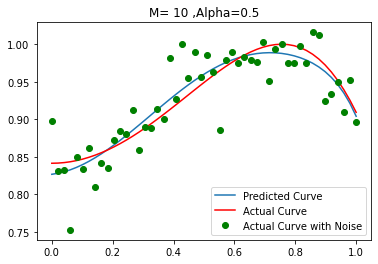

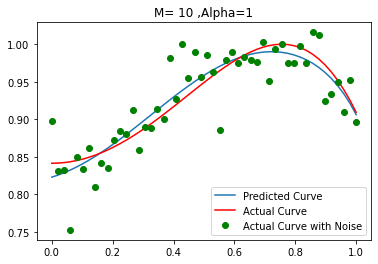

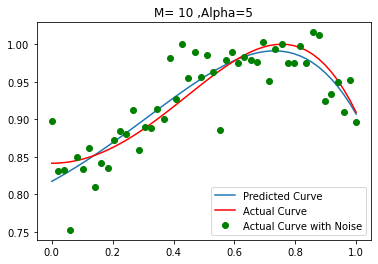

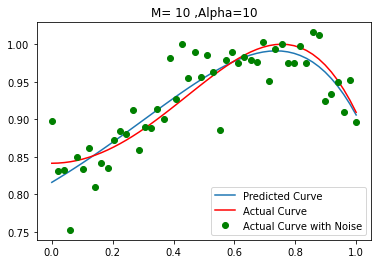

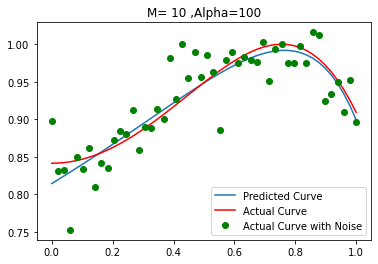

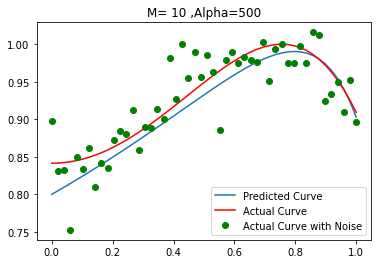

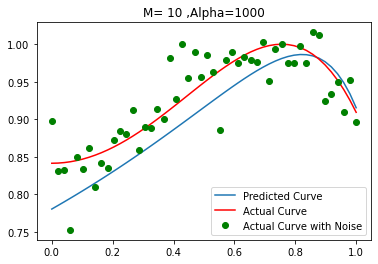

In [8]:
for i in range(0,len(alpha_vals)):
    alpha=alpha_vals[i]
    beta=(1/np.power(sigma,2))
    N=len(x_arr)
    M=10
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x_arr[n],m)
        vy[n]=y_noise[n]
    mxx=np.dot(mx.T,mx)
    imxx=linalg.pinv(mxx+((alpha/beta)*np.identity(M+1)))
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    y=np.dot(w.T,mx.T)
    plt.title("M= "+ str(M)+" ,Alpha="+str(alpha))
    plt.plot(x_arr,y.T,label='Predicted Curve')
    plt.plot(x_arr,y_sin,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

    total_absolute_error=abs(y_sin-y)
    error_alpha.append(np.sum(total_absolute_error)/len(x_arr))

Keeping alpha constant and varying M:

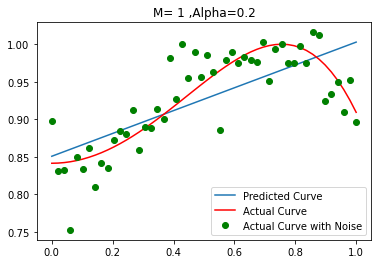

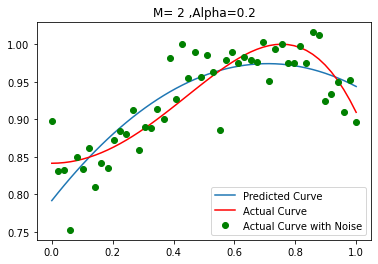

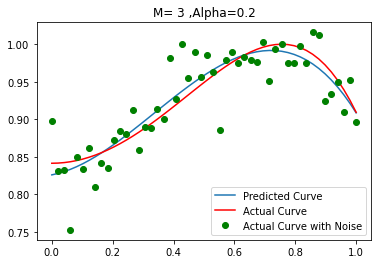

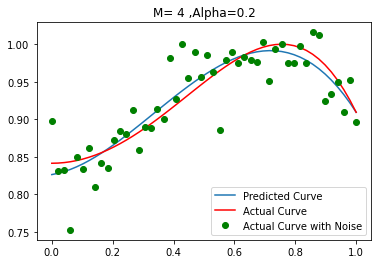

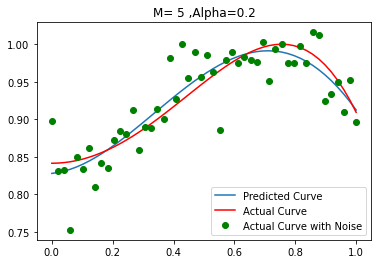

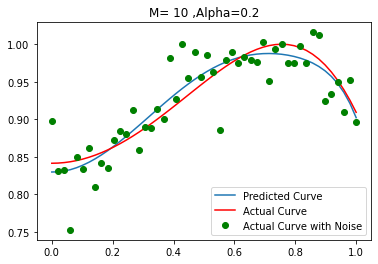

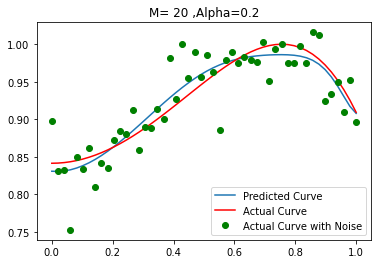

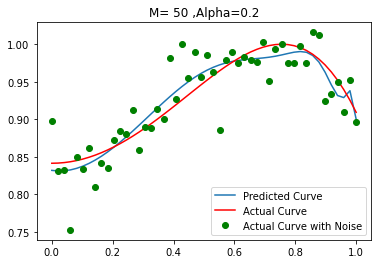

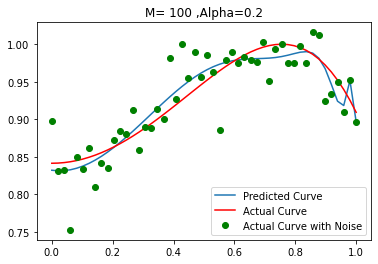

In [9]:
for i in range(0,len(M_vals)):
    alpha=0.2
    beta=(1/np.power(0.05,2))
    N=len(x_arr)
    M=M_vals[i]
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x_arr[n],m)
        vy[n]=y_noise[n]
    mxx=np.dot(mx.T,mx)
    imxx=linalg.pinv(mxx+((alpha/beta)*np.identity(M+1)))
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    y=np.dot(w.T,mx.T)
    plt.title("M= "+ str(M)+" ,Alpha="+str(alpha))
    plt.plot(x_arr,y.T,label='Predicted Curve')
    plt.plot(x_arr,y_sin,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

    total_absolute_error=abs(y_sin-y)
    error_M.append(np.sum(total_absolute_error)/len(x_arr))

In [10]:
error_M

[0.023979938661429206,
 0.01849284930885118,
 0.007996856342546297,
 0.008109202928817054,
 0.00842874957019717,
 0.00889497077181943,
 0.009177759729444825,
 0.010090035705358285,
 0.010827768521307608]

In [11]:
error_alpha

[0.01388512908615242,
 0.011431236566594605,
 0.010507864861059235,
 0.010085630786278015,
 0.009633289537967483,
 0.009168436041395523,
 0.008756688297052782,
 0.008661368028787366,
 0.00845836199035046,
 0.008378000499612006,
 0.008318133292953323,
 0.0067346048950687855,
 0.013961847911543939,
 0.02763008556528435]

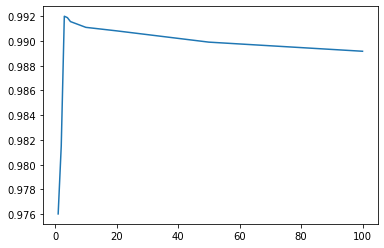

In [12]:
plt.plot(M_vals,1-np.array(error_M))

Q8) Describing influence of alpha and M on accuracy:
From the above observation plots, it can be seen that overfitting takes places with small values of alpha for a particular value of M and decreases to provide better fit for higher fit. On the other hand, when alpha is kept constant and M is varied, it can be observed that underfitting takes place for small values of M,i.e until M=2 beyond which it is observed to fit correctly between the range of 3 to 20. However, in both cases,i.e varying alpha parameter and varying M parameter, it can also be seen that further increase in the value of either of the hyperparameters leads to overfitting. 


## Part 2: Basis Function

1) Generating the data

In [13]:
x_arr=np.linspace(0,1,50) #defining the input
#y=0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61
y_sin=np.sin(np.power(x_arr,2)+1) #defining the function

mu=0 #setting the value of mean for the noise to be added
sigma=0.05 #setting the value 
noise=np.random.normal(mu,sigma,len(y_sin))
y_noise=y_sin+noise
N=len(x_arr)
#M=5 #Setting M value
#mx=np.zeros([N,M+1]) #initializing value of M-dimensional input 
vy=np.zeros([N,1]) #initializing the output data values
for n in range(0,N):
    #for m in range(0,M+1):
    #    mx[n][m]=np.power(x_arr[n],m) #computing the polynomial function and saving in array
    vy[n]=y_noise[n]

The basis functions have been generated as per the formuae provided below:
    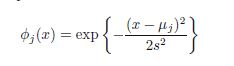
    

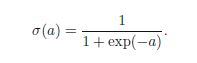

Generating sample gaussian basis function:

In [14]:
M=9
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.05
for m in range(1,M):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(1,M):
        phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))

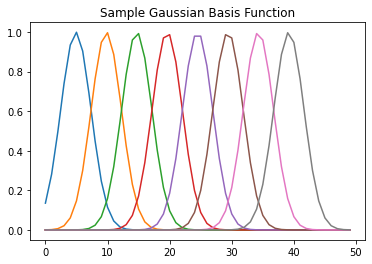

In [15]:
for i in range(1,9):
    #print(i)
    plt.plot(phi_x[:,i])           

plt.title("Sample Gaussian Basis Function")
plt.show()

2) Fitting the data using MLE:
Here the dimensionality M of the input is considered to be 9 while the sigma value of the gaussian basis function is considered to be 0.3. The w parameter obtained through MLE has been estimated using the equation given in the image below:
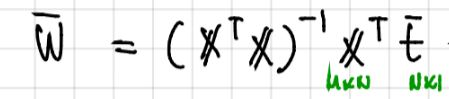

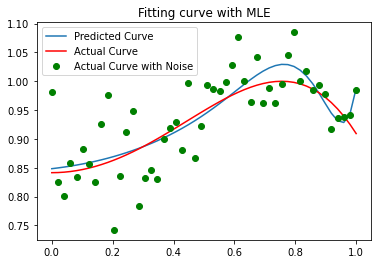

In [16]:
M=9
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.3
for m in range(1,M):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(1,M):
        phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y=np.dot(w.T,phi_x.T)
plt.title("Fitting curve with MLE")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

3) Generating sample overfitting curve for M=200 and sigma=0.01:
    From the plot containing the generated curve below, it can be seen that the curve overfits at all the noise related points.

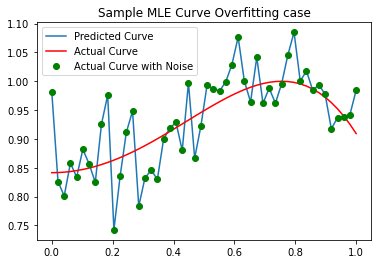

In [17]:
M=200
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.01
for m in range(1,M):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(1,M):
        phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y=np.dot(w.T,phi_x.T)
plt.title("Sample MLE Curve Overfitting case")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

3) Generating sample underfitting curve for M=2 and sigma=0.5 using gaussian basis function:
    From the plot containing the generated curve below, it can be seen that the curve is undefitting.

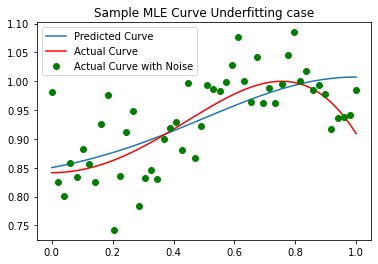

In [18]:
M=2
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.5
for m in range(1,M):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(1,M):
        phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y=np.dot(w.T,phi_x.T)
plt.title("Sample MLE Curve Underfitting case")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

3) Generating sample overfitting curve for M=100 and sigma=0.01 using sigmoid basis function:
    From the plot containing the generated curve below, it can be seen that the curve overfits at all the noise related points.

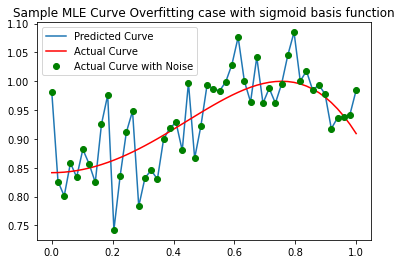

In [19]:
M=100
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.01
for m in range(1,M+1):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(0,M):
        phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y=np.dot(w.T,phi_x.T)
plt.title("Sample MLE Curve Overfitting case with sigmoid basis function")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

3) Generating sample underfitting curve for M=2 and sigma=0.5 using sigmoid basis function:
    From the plot containing the generated curve below, it can be seen that the curve is underfitting.

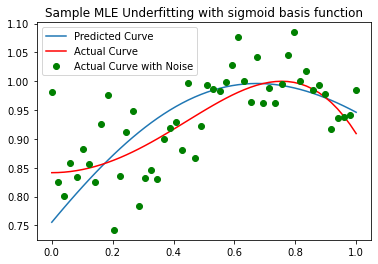

In [20]:
M=2
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.5
for m in range(1,M+1):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(0,M):
        phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y=np.dot(w.T,phi_x.T)
plt.title("Sample MLE Underfitting with sigmoid basis function")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

4) i) Varying M value to generate overfitting and underfitting curves for gaussian basis function:

In [21]:
M_values=[1,2,3,4,5,6,7,8,9,10,15,20,50,100,500,1000]
#sigma_values=[0.01,0.05,0.1,0.2,0.5,0.8,1,2,5,10]

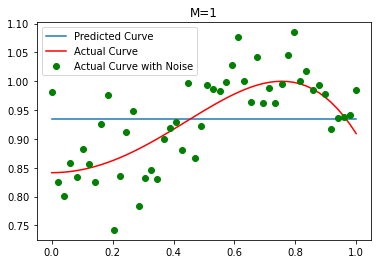

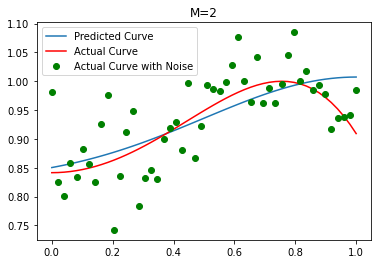

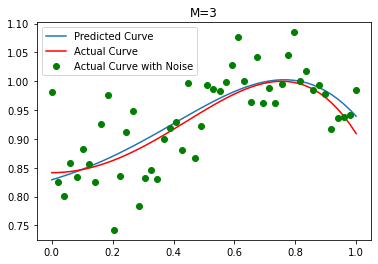

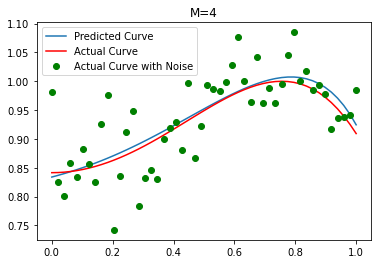

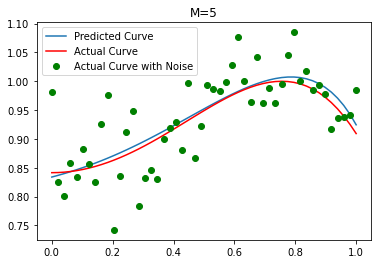

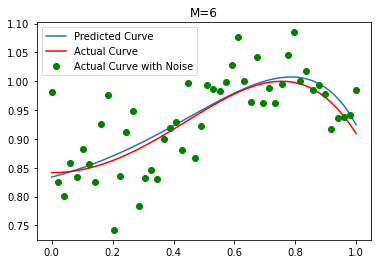

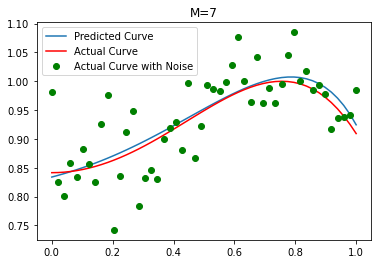

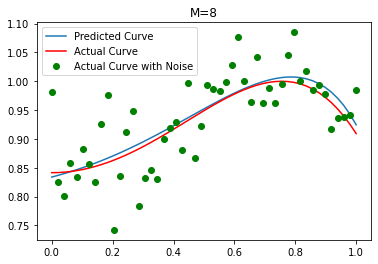

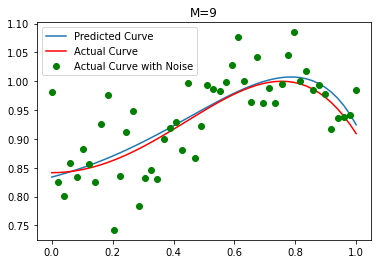

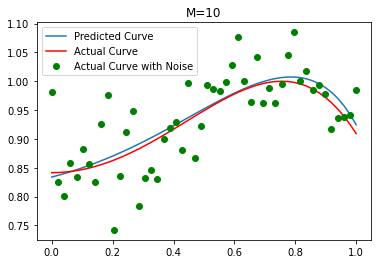

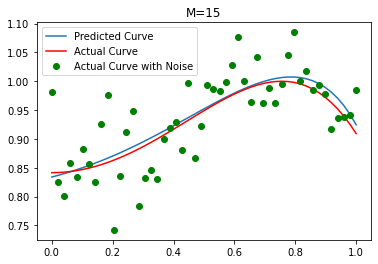

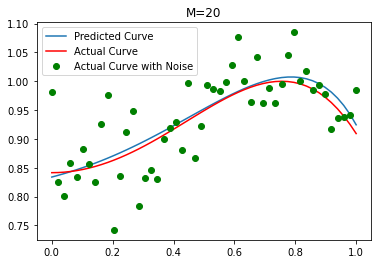

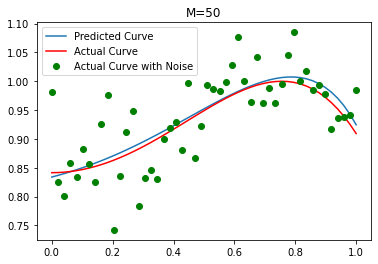

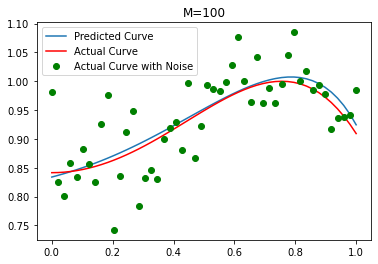

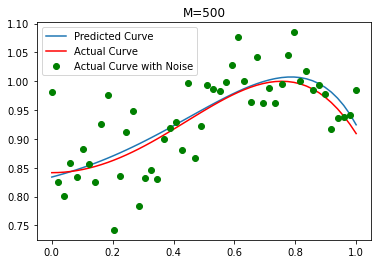

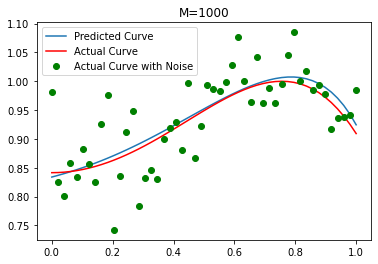

In [22]:
for i in range(0,len(M_values)):
    
    M=M_values[i]
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=0.5
    for m in range(1,M+1):
        mean_init=mean_init+(2*sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)
    
    y=np.dot(w.T,phi_x.T)
    plt.title("M="+str(M))
    plt.plot(x_arr,y.T,label='Predicted Curve')
    plt.plot(x_arr,y_sin,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

5) Varying M value to generate overfitting and underfitting curves for sigmoid basis function:

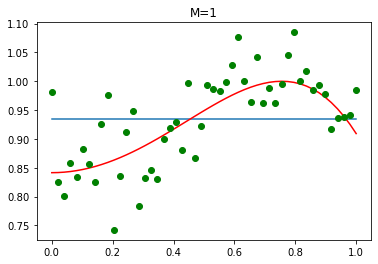

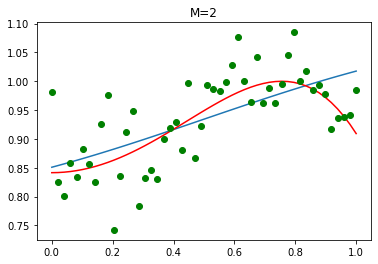

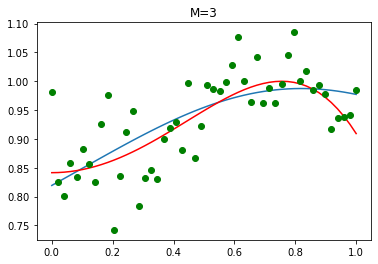

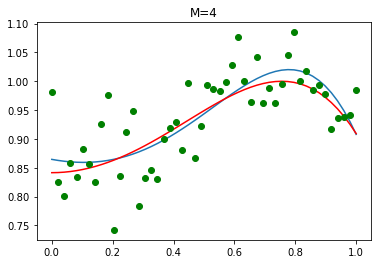

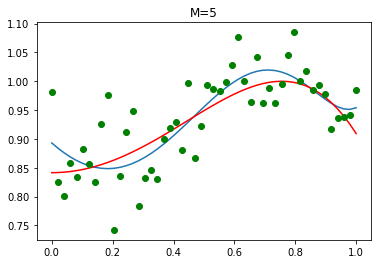

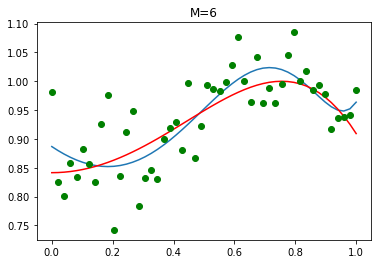

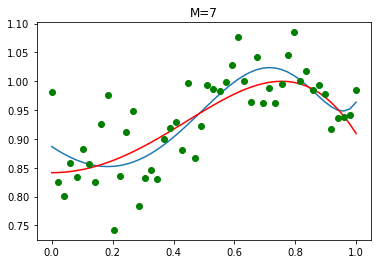

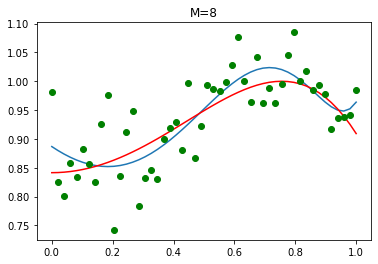

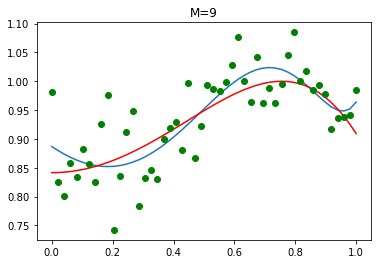

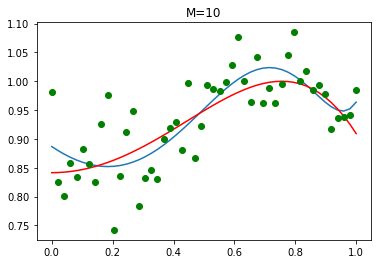

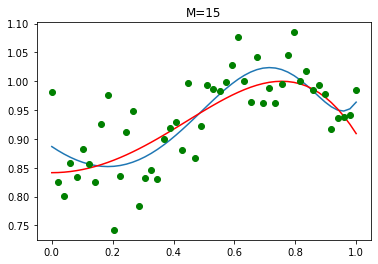

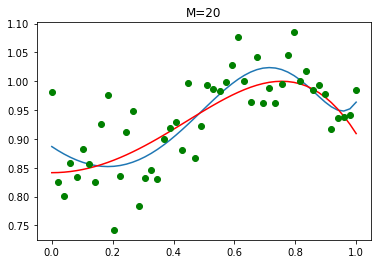

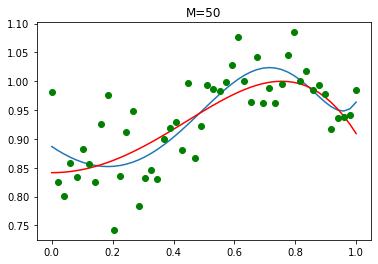

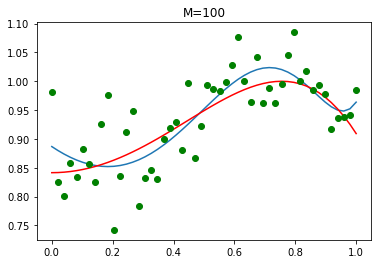

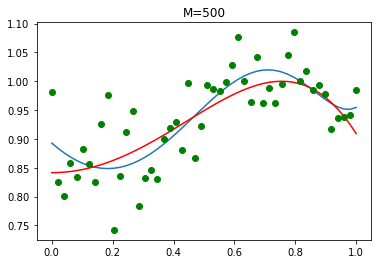

C:\Users\Varshini\AppData\Local\Temp/ipykernel_30652/428071000.py:14: RuntimeWarning: overflow encountered in exp
  phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))


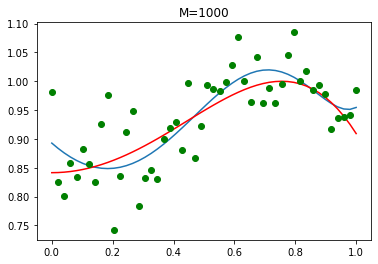

In [23]:
for i in range(0,len(M_values)):   
    M=M_values[i]
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=0.5
    for m in range(1,M+1):
        mean_init=mean_init+(sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)

    y=np.dot(w.T,phi_x.T)
    plt.title("M="+str(M))
    plt.plot(x_arr,y.T)
    plt.plot(x_arr,y_sin,'red')
    plt.plot(x_arr,y_noise,'go')
    plt.show()

6) Generating the function y= 0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61: 
i) Input data consists of 50 evenly spaced points lying between 0 to 8.5
ii) The noise generated for the output has a mean of 0 and variance sigma value of 2

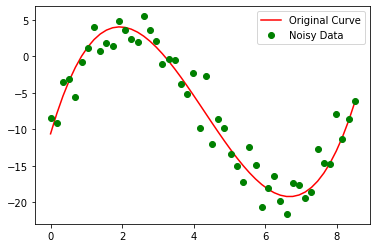

In [61]:
x_arr=np.linspace(0,8.5,50)
y=0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61
y_sin=np.sin(np.power(x_arr,2)+1)

mu=0
sigma=2
noise=np.random.normal(mu,sigma,len(y))
y_noise_1=y+noise

plt.plot(x_arr,y,'red',label='Original Curve')
plt.plot(x_arr,y_noise_1,'go',label='Noisy Data')
plt.legend()
plt.show()


N=len(x_arr)
#M=10
#mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
#    for m in range(0,M+1):
#        mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise_1[n]

In [25]:
N=len(x_arr)
#M=10
#mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
#    for m in range(0,M+1):
#        mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise_1[n]

Obtaining best fit curve using sigmoid basis function:
M is set as 100 while the variance for the sigmoid basis function is generated as 1.5

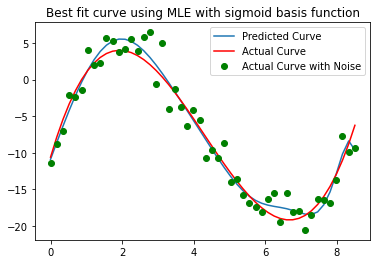

In [26]:
M=100
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=1.5
for m in range(1,M+1):
    mean_init=mean_init+(sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(1,M):
        phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y_pred=np.dot(w.T,phi_x.T)
plt.title("Best fit curve using MLE with sigmoid basis function")
plt.plot(x_arr,y_pred.T,label='Predicted Curve')
plt.plot(x_arr,y,'red',label='Actual Curve')
plt.plot(x_arr,y_noise_1,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

7) i) Varying parameters of Gaussian basis function:


In [27]:
M_values=[1,2,3,4,5,6,7,8,9,10,15,20,50,100]
sigma_values=[0.01,0.05,0.1,0.2,0.5,0.8,1,2,5,10]

Varying M and keeping sigma constant for gaussian basis:

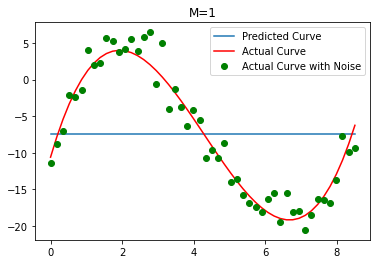

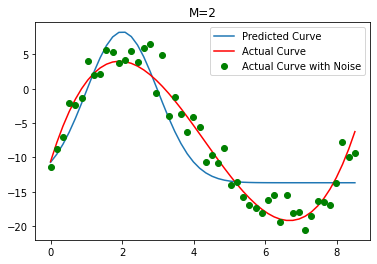

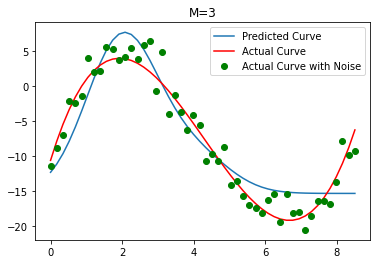

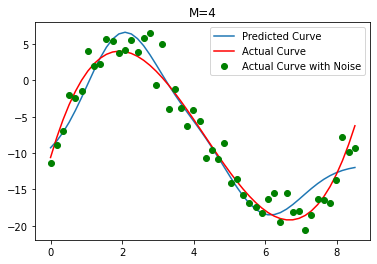

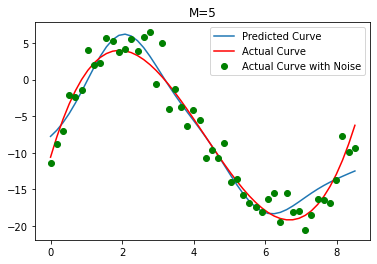

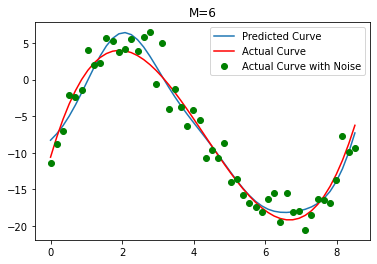

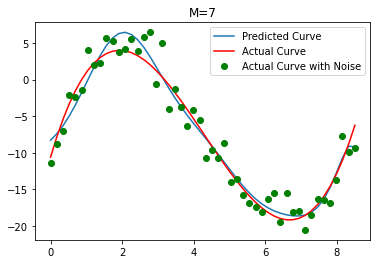

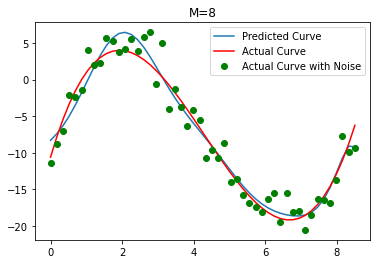

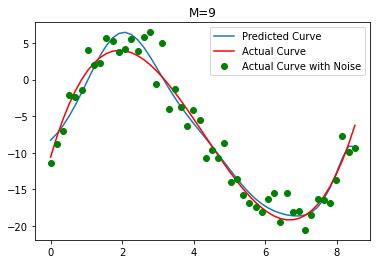

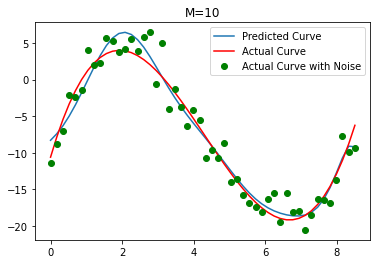

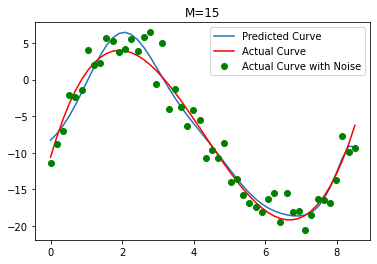

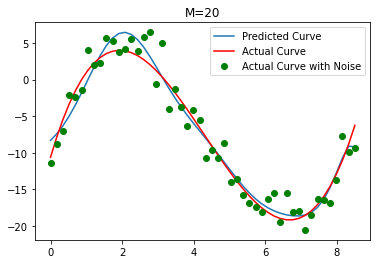

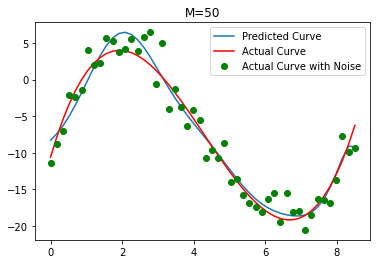

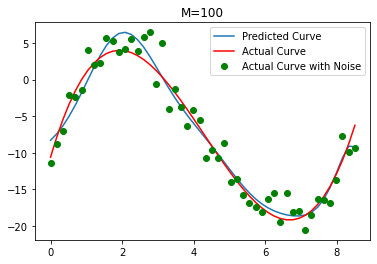

In [28]:
for i in range(0,len(M_values)):
    
    M=M_values[i]
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=1
    for m in range(1,M+1):
        mean_init=mean_init+(2*sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)
    
    y_pred=np.dot(w.T,phi_x.T)
    plt.title("M="+str(M))
    plt.plot(x_arr,y_pred.T,label='Predicted Curve')
    plt.plot(x_arr,y,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise_1,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

Keeping M constant and varying sigma for gaussian basis:

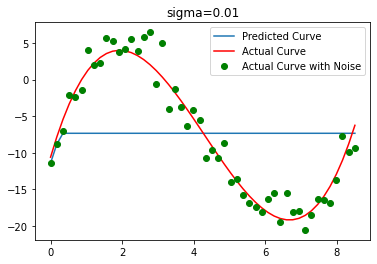

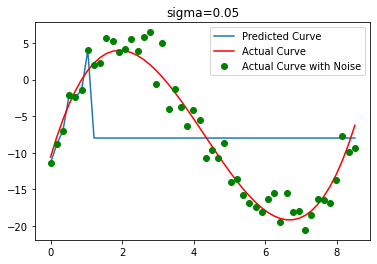

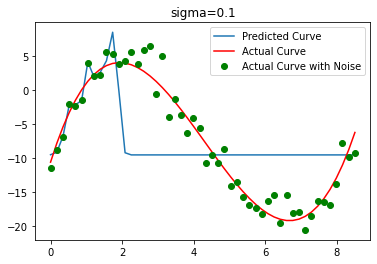

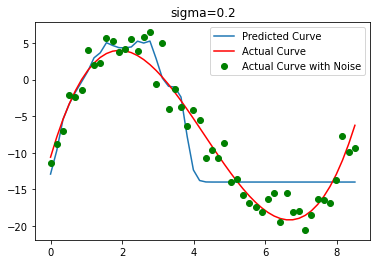

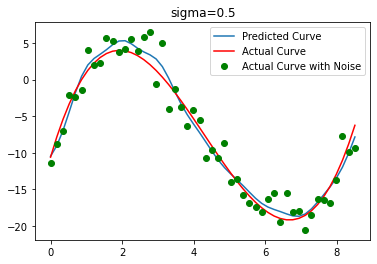

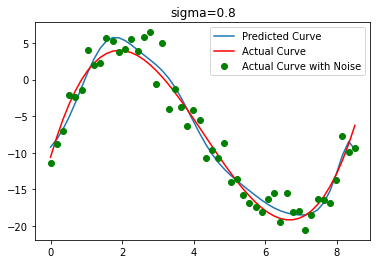

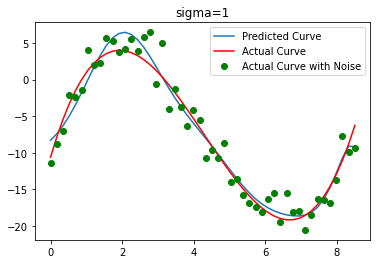

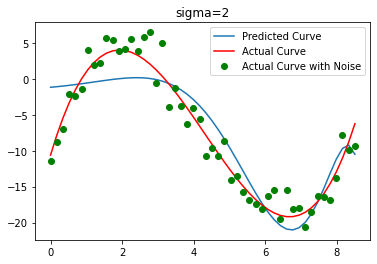

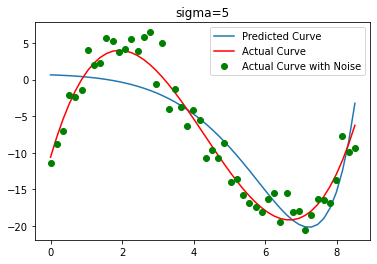

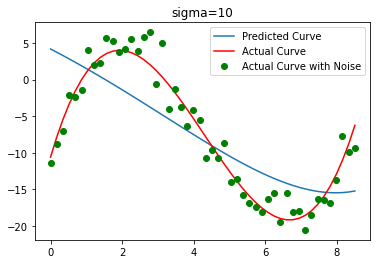

In [29]:
for i in range(0,len(sigma_values)):
    
    M=10
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=sigma_values[i]
    for m in range(1,M+1):
        mean_init=mean_init+(2*sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)
    
    y_pred=np.dot(w.T,phi_x.T)
    plt.title("sigma="+str(sigma))
    plt.plot(x_arr,y_pred.T,label='Predicted Curve')
    plt.plot(x_arr,y,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise_1,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

i) From the above plots, it can be seen that when M is varied keeping sigma constant, underfitting occurs for small values of M beyond which correct fitting takes place.
ii) When M is kept constant and sigma for the gaussian basis function is varied, the curve is observed to correcty fit at lower values of sigma while it underfits at higher values.

Varying parameters of sigmoid basis function:

Keeping sigma constant and varying M values:

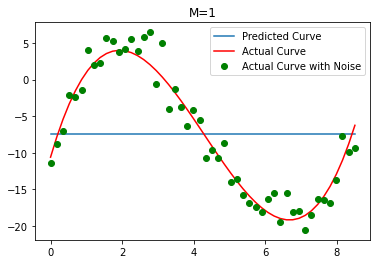

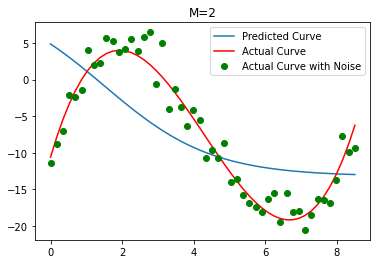

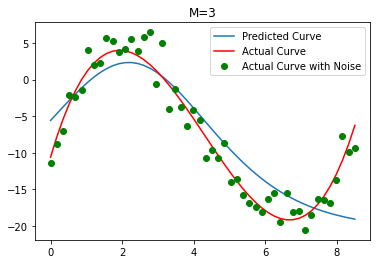

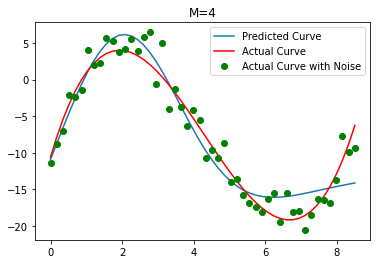

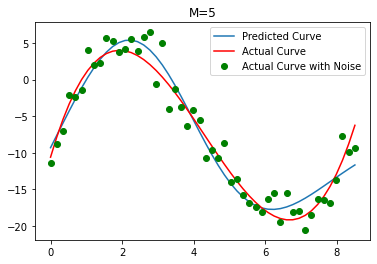

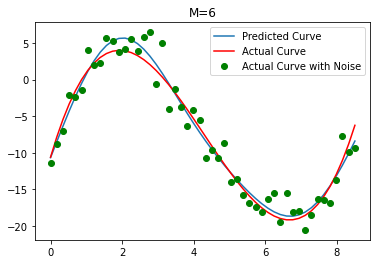

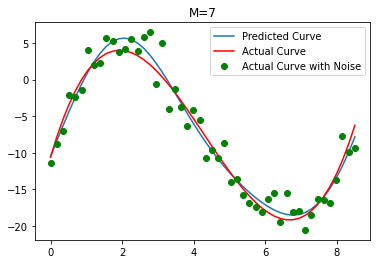

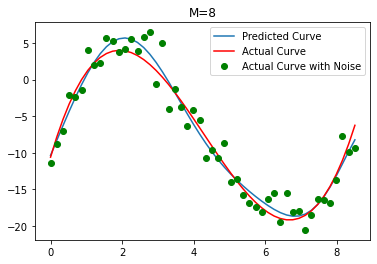

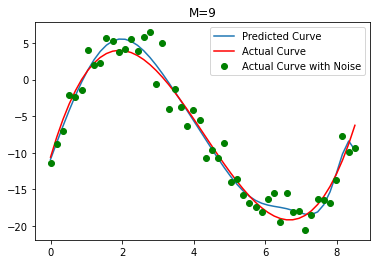

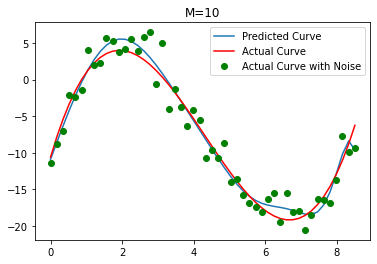

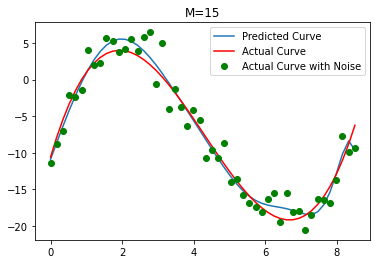

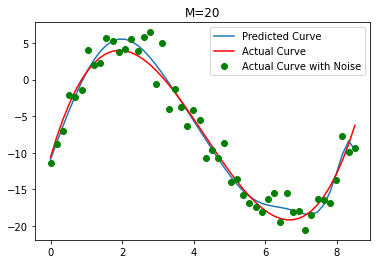

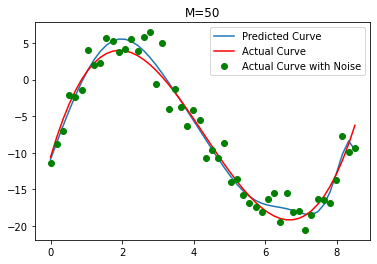

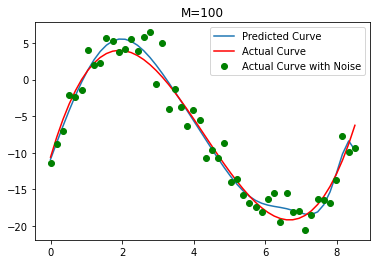

In [30]:
for i in range(0,len(M_values)):   
    M=M_values[i]
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=1.5
    for m in range(1,M+1):
        mean_init=mean_init+(sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)

    y_pred=np.dot(w.T,phi_x.T)
    plt.title("M="+str(M))
    plt.plot(x_arr,y_pred.T,label='Predicted Curve')
    plt.plot(x_arr,y,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise_1,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

Varying sigma values and keeping M constant for sigmoid basis function:

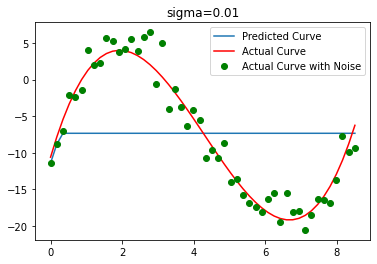

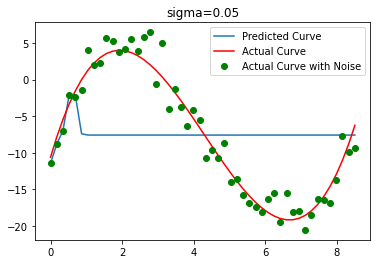

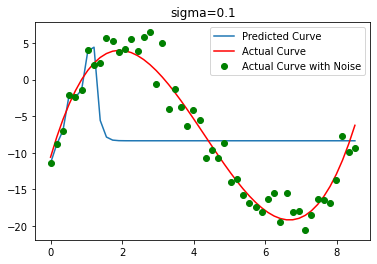

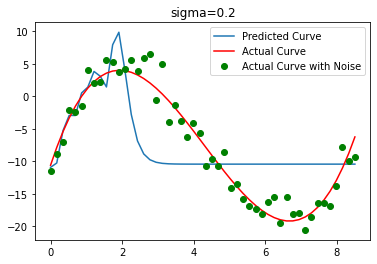

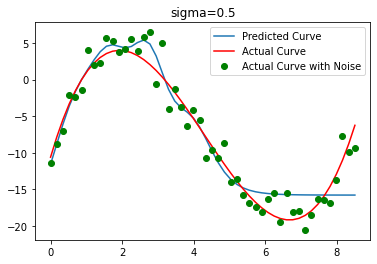

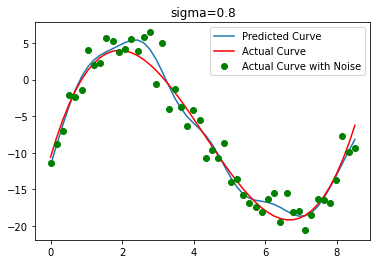

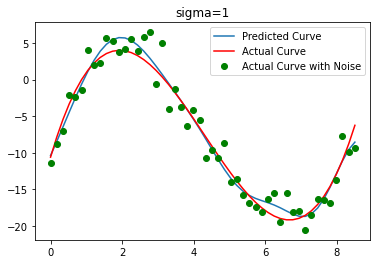

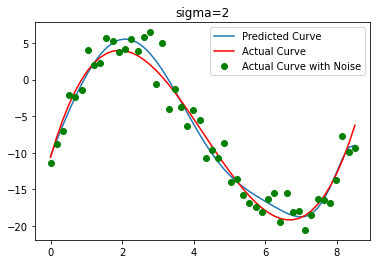

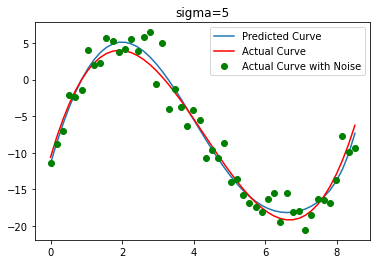

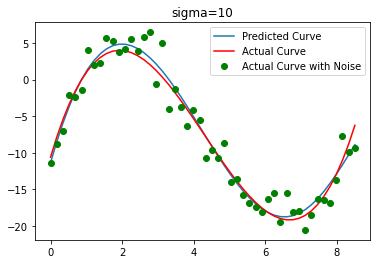

In [31]:
for i in range(0,len(sigma_values)):   
    M=10
    mean_init=0
    mean_m=[]
    mean_m.append(0)
    sigma=sigma_values[i]
    for m in range(1,M+1):
        mean_init=mean_init+(sigma)
        mean_m.append(mean_init)
    phi_x=np.zeros([N,M])
    phi_x[:,0]=1
    for n in range(0,N):
        for m in range(1,M):
            phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
    from scipy import linalg
    mxx=np.dot(phi_x.T,phi_x)
    imxx=linalg.pinv(mxx)
    tmp=np.dot(imxx,phi_x.T)
    w=np.dot(tmp,vy)

    y_pred=np.dot(w.T,phi_x.T)
    plt.title("sigma="+str(sigma))
    plt.plot(x_arr,y_pred.T,label="Predicted Curve")
    plt.plot(x_arr,y,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise_1,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

i) From the above plots it can be seen that when sigma is kept constant and M is varied for sigmoid basis function, the curve underfts at lower values of M beyond which it begins to correctly fit.
ii) when sigma is varied and M is kept constant, the curve undefits at lower values of sigma following which it undergoes correct fitting at higher values of sigma.

Polynomial functions when used do not provide a bound on values obtained from using higher values of M, i.e for very large values of M, the corresponding input for that value x_n^M can be a very high value which can in turn make it difficult to obtain a solution for fitting the curve. Basis Functions such as the Gaussian Basis Function and the Sigmoid Basis Function provide a limit on values for higher values of M as a result of which fitting is found to become better. Polynomial functions are more prone to overfitting while basis functions can help generalize better. Polynomial functions are global functions and thus changes in one region of space can affect all other regions while basis functions such as gaussian basis functions and sigmoid basis functions are local basis functions where changes in the input will only affect only the surrounding region and not the entire space. Polynomial functions can help fit increasing and decreasing functions while basis functions can fit better to non linear functions that are not continuously increasing or decreasing. 

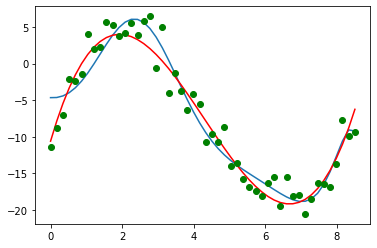

In [32]:
M=8
mean_init=0
mean_m=[]
mean_m.append(0)
sigma=0.8
for m in range(1,M+1):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M+1])
for n in range(0,N):
    for m in range(0,M+1):
        phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
from scipy import linalg
mxx=np.dot(phi_x.T,phi_x)
imxx=linalg.pinv(mxx)
tmp=np.dot(imxx,phi_x.T)
w=np.dot(tmp,vy)

y_pred=np.dot(w.T,phi_x.T)
plt.plot(x_arr,y_pred.T)
plt.plot(x_arr,y,'red')
plt.plot(x_arr,y_noise_1,'go')
plt.show()

## Part 3: Full Bayesian + Predictive Distribution

1) Generating the data:

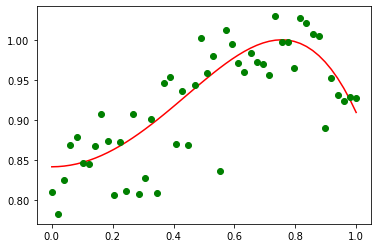

In [33]:
x_arr=np.linspace(0,1,50)
#y=0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61
y_sin=np.sin(np.power(x_arr,2)+1)

mu=0
sigma=0.04
noise=np.random.normal(mu,sigma,len(y_sin))
y_noise=y_sin+noise

plt.plot(x_arr,y_sin,'red')
plt.plot(x_arr,y_noise,'go')
plt.show()

N=len(x_arr)
#M=50
#mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
    #for m in range(0,M+1):
    #    mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise[n]

In [34]:
def make_gaussian(x, s=0.1, p = 5):

    gaussian = np.zeros(shape = (x.size, p))

    gaussian[:,0] = 1
    m=s
    for i in np.arange(1,p):
        gaussian[:,i] = np.exp(-(x-m*10/10)**2/(2*s**2))
        m=m+s

    return gaussian

In [35]:
def make_design(x, s=0.1, p = 5):

    design = np.zeros(shape = (x.size, p))

    design[:,0] = 1
    m=s
    for i in np.arange(1,p):
        design[:,i] = np.exp(-(x-m*10/10)**2/(2*s**2))
        m=m+s

    return design

2) Displaying best fitting curve and the estimated values of w:


In [36]:
M=5
# mean_init=0
# mean_m=[]
# mean_m.append(0)
sigma=0.5

# for m in range(1,M+1):
#     mean_init=mean_init+(2*sigma)
#     mean_m.append(mean_init)
# phi_x=np.zeros([N,M+1])
# for n in range(0,N):
#     for m in range(0,M+1):
#         phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
phi_x = make_gaussian(x_arr,s=sigma,p=M)       
alpha=2
sigma1=0.04
beta=(1/np.power(sigma1,2))
m0=np.zeros(M)
s0=1/alpha * np.identity(M)
# for n in range(0,N):
    
# #     S_0_inv = np.linalg.pinv(s0)
# #     S_1 = np.linalg.pinv(S_0_inv + beta * np.dot(phi_x.T, phi_x))    
# #     m_1 = (S_1 @ (np.dot(S_0_inv,m0) + beta * np.dot(phi_x.T,y_noise)))
    
#     S_0_inv = np.linalg.pinv(s0)
#     S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)   
#     m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(phi_x.T,y_noise))
#     # phi_xx=np.dot(phi_x.T,phi_x)
#     # imxx=linalg.pinv(beta*phi_xx+((alpha)*np.identity(M+1)))
#     # tmp=(np.dot(imxx,phi_x.T))
#     # w=beta*(np.dot(tmp,vy))
#     s0 = S_1.copy()
#     m0 = m_1.copy() 
S_0_inv = np.linalg.pinv(s0)
S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)  
m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(y_noise,phi_x))

y=np.dot(m_1.T,phi_x.T)
# plt.plot(x_arr,y.T,label='Predicted Curve')
# plt.plot(x_arr,y_sin,'red',label='Actual Curve')
# plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
# plt.legend()
# plt.show()

print("Estimated values of w= ",m_1)

Estimated values of w=  [ 0.85382284 -0.1453719   0.49772152 -0.49314393 -0.34360992]


Varying alpha and beta terms to observe variations:


In [37]:
sigma1_vals=[0.005,0.01,0.05,0.1,0.2,0.4,0.5,1,2,5,10,20]
alpha_vals=[0.001,0.01,0.05,0.1,0.2,0.4,0.5,0.8,1,1.5,2,5,10,20,50,100]

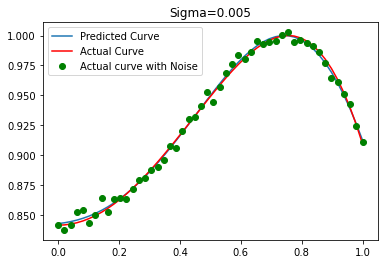

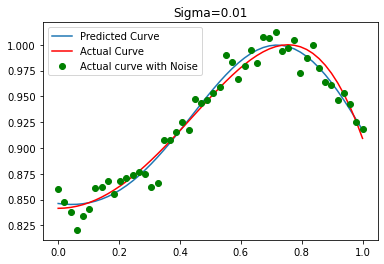

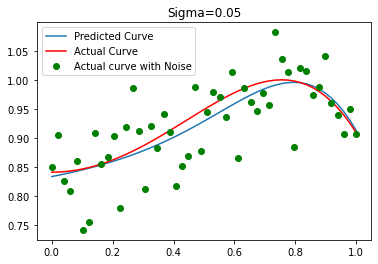

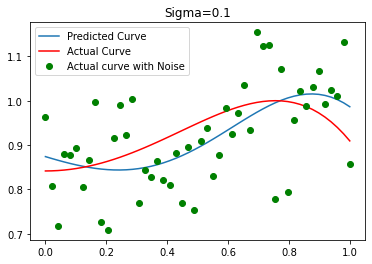

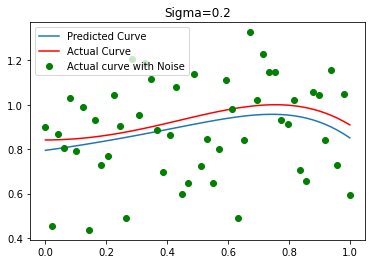

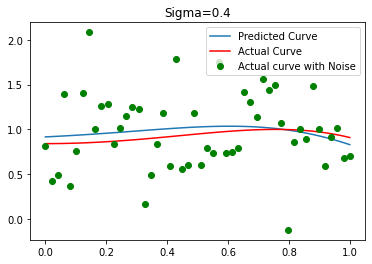

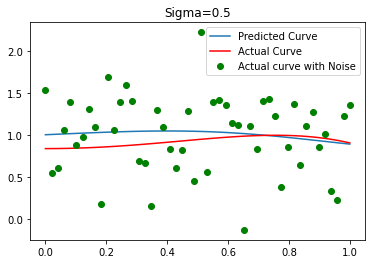

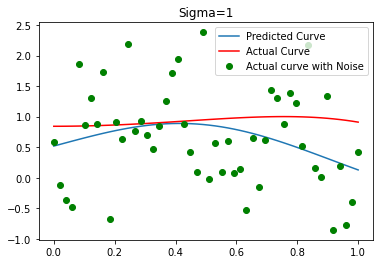

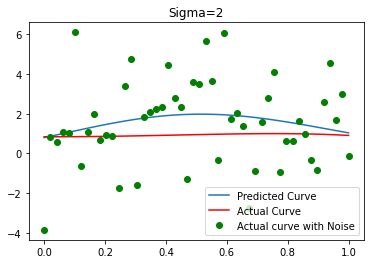

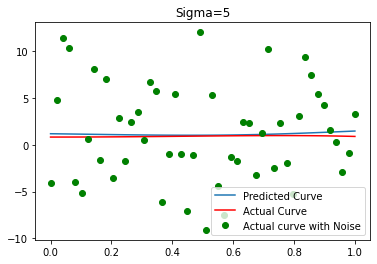

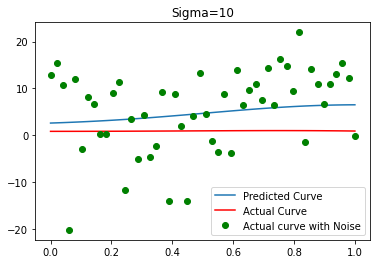

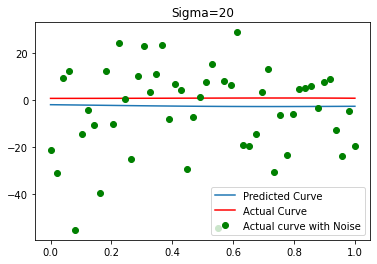

In [38]:
for i in range(0,len(sigma1_vals)):

    M=10
    # mean_init=0
    # mean_m=[]
    # mean_m.append(0)
    sigma=0.4
    sigma1=sigma1_vals[i]
    # for m in range(1,M+1):
    #     mean_init=mean_init+(2*sigma)
    #     mean_m.append(mean_init)
    # phi_x=np.zeros([N,M+1])
    # for n in range(0,N):
    #     for m in range(0,M+1):
    #         phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
    
    mu=0
    
    noise=np.random.normal(mu,sigma1,len(y_sin))
    y_noise=y_sin+noise
    N=len(x_arr)
    #M=50
    #mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    for n in range(0,N):
#         for m in range(0,M+1):
#             mx[n][m]=np.power(x_arr[n],m)
        vy[n]=y_noise[n]

    phi_x = make_gaussian(x_arr,s=sigma,p=M)       
    alpha=0.2
    sigma1=sigma1_vals[i]
    beta=(1/np.power(sigma1,2))
    m0=np.zeros(M)
    s0=1/alpha * np.identity(M)
    # for n in range(0,N):

    # #     S_0_inv = np.linalg.pinv(s0)
    # #     S_1 = np.linalg.pinv(S_0_inv + beta * np.dot(phi_x.T, phi_x))    
    # #     m_1 = (S_1 @ (np.dot(S_0_inv,m0) + beta * np.dot(phi_x.T,y_noise)))

    #     S_0_inv = np.linalg.pinv(s0)
    #     S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)   
    #     m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(phi_x.T,y_noise))
    #     # phi_xx=np.dot(phi_x.T,phi_x)
    #     # imxx=linalg.pinv(beta*phi_xx+((alpha)*np.identity(M+1)))
    #     # tmp=(np.dot(imxx,phi_x.T))
    #     # w=beta*(np.dot(tmp,vy))
    #     s0 = S_1.copy()
    #     m0 = m_1.copy() 
    S_0_inv = np.linalg.pinv(s0)
    S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)  
    m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(y_noise,phi_x))

    y=np.dot(m_1.T,phi_x.T)
    plt.title("Sigma="+str(sigma1))
    plt.plot(x_arr,y.T,label="Predicted Curve")
    plt.plot(x_arr,y_sin,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise,'go',label='Actual curve with Noise')
    #plt.ylim(-2,2)
    plt.legend()
    plt.show()

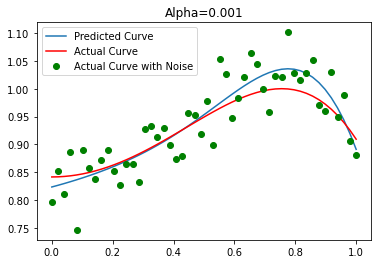

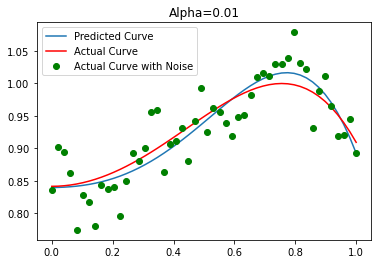

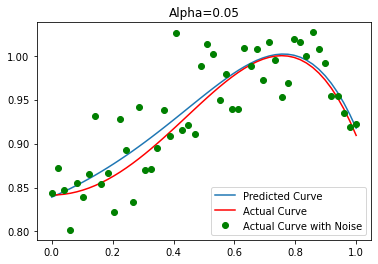

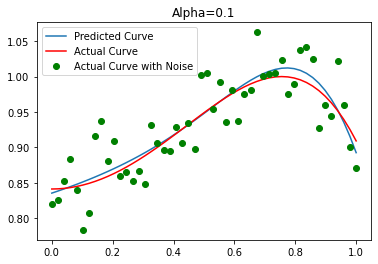

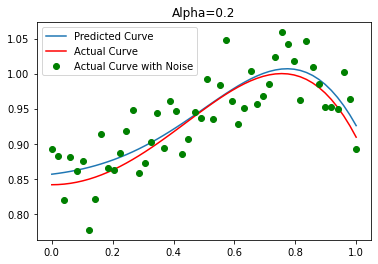

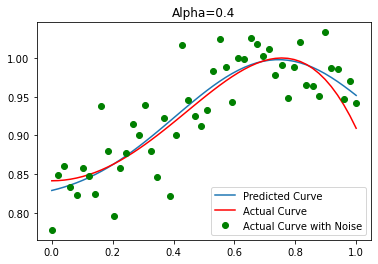

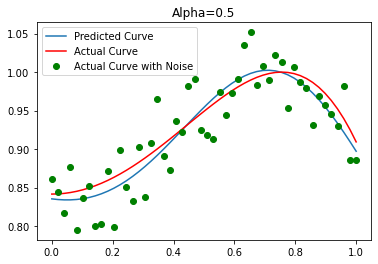

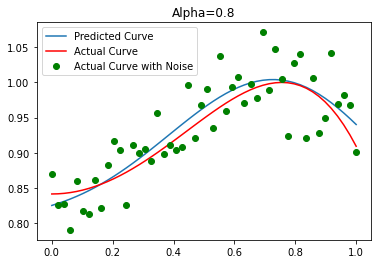

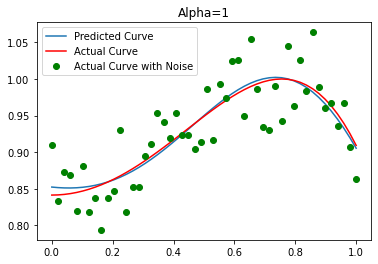

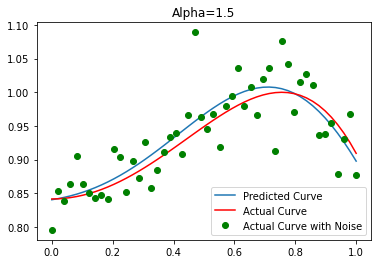

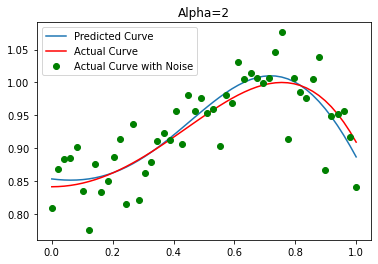

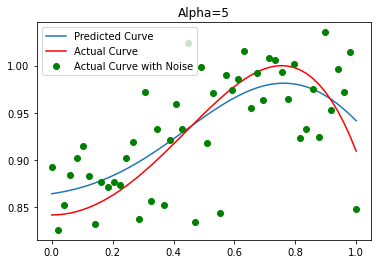

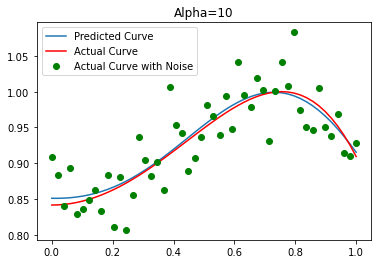

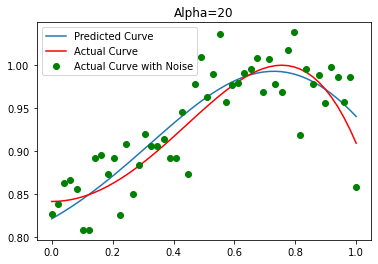

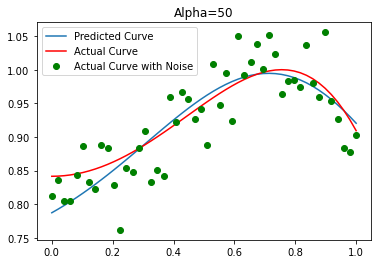

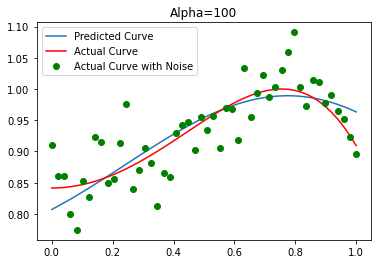

In [39]:
for i in range(0,len(alpha_vals)):    
    M=10
    # mean_init=0
    # mean_m=[]
    # mean_m.append(0)
    sigma=0.4

    # for m in range(1,M+1):
    #     mean_init=mean_init+(2*sigma)
    #     mean_m.append(mean_init)
    # phi_x=np.zeros([N,M+1])
    # for n in range(0,N):
    #     for m in range(0,M+1):
    #         phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
    phi_x = make_gaussian(x_arr,s=sigma,p=M)       
    alpha=alpha_vals[i]
    sigma1=0.04
    mu=0
    
    noise=np.random.normal(mu,sigma1,len(y_sin))
    y_noise=y_sin+noise
    N=len(x_arr)
    #M=50
    #mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    for n in range(0,N):
#         for m in range(0,M+1):
#             mx[n][m]=np.power(x_arr[n],m)
        vy[n]=y_noise[n]
    beta=(1/np.power(sigma1,2))
    m0=np.zeros(M)
    s0=1/alpha * np.identity(M)
    # for n in range(0,N):

    # #     S_0_inv = np.linalg.pinv(s0)
    # #     S_1 = np.linalg.pinv(S_0_inv + beta * np.dot(phi_x.T, phi_x))    
    # #     m_1 = (S_1 @ (np.dot(S_0_inv,m0) + beta * np.dot(phi_x.T,y_noise)))

    #     S_0_inv = np.linalg.pinv(s0)
    #     S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)   
    #     m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(phi_x.T,y_noise))
    #     # phi_xx=np.dot(phi_x.T,phi_x)
    #     # imxx=linalg.pinv(beta*phi_xx+((alpha)*np.identity(M+1)))
    #     # tmp=(np.dot(imxx,phi_x.T))
    #     # w=beta*(np.dot(tmp,vy))
    #     s0 = S_1.copy()
    #     m0 = m_1.copy() 
    S_0_inv = np.linalg.pinv(s0)
    S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)  
    m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(y_noise,phi_x))

    y=np.dot(m_1.T,phi_x.T)
    
    plt.title("Alpha="+str(alpha))
    plt.plot(x_arr,y.T,label='Predicted Curve')
    plt.plot(x_arr,y_sin,'red',label='Actual Curve')
    plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
    plt.legend()
    plt.show()

From the above plots obtained from varying the values of alpha and beta, it can be seen that decrease in the value of beta and increase in the value of alpha leads to increase in underfitting while for small values of alpha and high values of beta, the curve fits in the correct manner. Similary higher value of alpha implies higher uncertainty in the prior distribution of w and can therefore lead to underfitting. Decrease in the value of beta implies greater variance and therefore leads to underfitting. 
Alpha and beta together are used to form the regularization parameter that can in turn be used to prevent overfitting. 

4) Generating Best Fit Curve using Gaussian Basis Function:

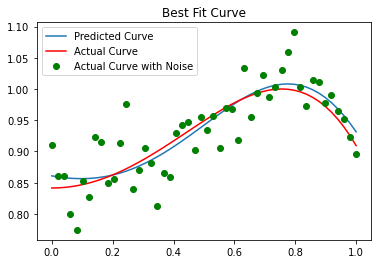

Estimated values of w=  [ 0.97261599 -0.30842984  0.61054147 -0.63450649 -0.59038855]


In [40]:
M=5
# mean_init=0
# mean_m=[]
# mean_m.append(0)
sigma=0.5

# for m in range(1,M+1):
#     mean_init=mean_init+(2*sigma)
#     mean_m.append(mean_init)
# phi_x=np.zeros([N,M+1])
# for n in range(0,N):
#     for m in range(0,M+1):
#         phi_x[n][m]=np.exp(-np.power((x_arr[n]-mean_m[m]),2)/(2*np.power(sigma,2)))
phi_x = make_gaussian(x_arr,s=sigma,p=M)       
alpha=2
sigma1=0.04
beta=(1/np.power(sigma1,2))
m0=np.zeros(M)
s0=1/alpha * np.identity(M)
# for n in range(0,N):
    
# #     S_0_inv = np.linalg.pinv(s0)
# #     S_1 = np.linalg.pinv(S_0_inv + beta * np.dot(phi_x.T, phi_x))    
# #     m_1 = (S_1 @ (np.dot(S_0_inv,m0) + beta * np.dot(phi_x.T,y_noise)))
    
#     S_0_inv = np.linalg.pinv(s0)
#     S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)   
#     m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(phi_x.T,y_noise))
#     # phi_xx=np.dot(phi_x.T,phi_x)
#     # imxx=linalg.pinv(beta*phi_xx+((alpha)*np.identity(M+1)))
#     # tmp=(np.dot(imxx,phi_x.T))
#     # w=beta*(np.dot(tmp,vy))
#     s0 = S_1.copy()
#     m0 = m_1.copy() 
S_0_inv = np.linalg.pinv(s0)
S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)  
m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(y_noise,phi_x))

y=np.dot(m_1.T,phi_x.T)
plt.title("Best Fit Curve")
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

print("Estimated values of w= ",m_1)

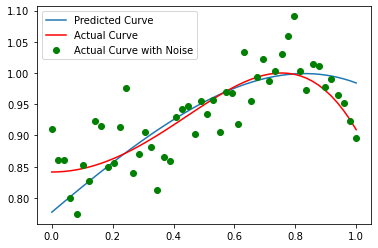

Estimated values of w =  [ 5.49077928e+00 -1.43762063e+01 -2.59810723e+00 -3.65524520e-01
 -4.97286732e-02 -6.73482584e-03 -9.11547178e-04 -1.23366100e-04
 -1.66958155e-05 -2.25953346e-06 -3.05794611e-07 -4.13848005e-08
 -5.60082370e-09 -7.57989061e-10 -1.02582664e-10 -1.38830539e-11
 -1.87886704e-12 -2.54277002e-13 -3.44126507e-14 -4.65724575e-15]


In [41]:
M=20
mean_init=1
mean_m=[]
mean_m.append(1)
sigma=1
for m in range(1,M+1):
    mean_init=mean_init+(2*sigma)
    mean_m.append(mean_init)
phi_x=np.zeros([N,M])
phi_x[:,0]=1
for n in range(0,N):
    for m in range(0,M):
        phi_x[n][m]=1/(1+np.exp(-((x_arr[n]-mean_m[m])/(sigma))))
from scipy import linalg
alpha=0.2
sigma1=0.04
beta=(1/np.power(sigma1,2))
m0=np.zeros(M)
s0=1/alpha * np.identity(M)
# for n in range(0,N):
    
# #     S_0_inv = np.linalg.pinv(s0)
# #     S_1 = np.linalg.pinv(S_0_inv + beta * np.dot(phi_x.T, phi_x))    
# #     m_1 = (S_1 @ (np.dot(S_0_inv,m0) + beta * np.dot(phi_x.T,y_noise)))
    
#     S_0_inv = np.linalg.pinv(s0)
#     S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)   
#     m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(phi_x.T,y_noise))
#     # phi_xx=np.dot(phi_x.T,phi_x)
#     # imxx=linalg.pinv(beta*phi_xx+((alpha)*np.identity(M+1)))
#     # tmp=(np.dot(imxx,phi_x.T))
#     # w=beta*(np.dot(tmp,vy))
#     s0 = S_1.copy()
#     m0 = m_1.copy() 
S_0_inv = np.linalg.pinv(s0)
S_1 = np.linalg.pinv(S_0_inv + beta * phi_x.T @ phi_x)  
m_1 = S_1 @ (S_0_inv @ m0 + beta * np.dot(y_noise,phi_x))

y=np.dot(m_1.T,phi_x.T)
plt.plot(x_arr,y.T,label='Predicted Curve')
plt.plot(x_arr,y_sin,'red',label='Actual Curve')
plt.plot(x_arr,y_noise,'go',label='Actual Curve with Noise')
plt.legend()
plt.show()

print("Estimated values of w = ",m_1)

Q5) The use of p(w/t) in training and test stages:
i) The posterior probability p(w/t) takes into account the likelihood as well as the prior. Since the prior information about w in the form of the prior probability p(w) is taken into account, the inference obtained as a result varies accordingly. 
ii) The uncertainty information about the parameter w is also provided which can in turn help in better training and testing performance. 
iii) In the case of testing, the probability(t*/t) where t* is prediction of incoming test input x* and t corresponds to the target value of the train data, is obtained through the posterior probality p(w/t). This predictive distribution gives the most probable value as well as the uncertainty associated with the predictions.


In [42]:
def make_design(x, s=0.1, p = 5):

    design = np.zeros(shape = (x.size, p))

    design[:,0] = 1
    m=s
    for i in np.arange(1,p):
        design[:,i] = np.exp(-(x-m*10/10)**2/(2*s**2))
        m=m+s

    return design

In [43]:
x = np.linspace(0,1,50)
Phi = make_design(x,p=4)

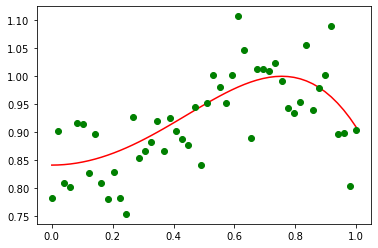

In [44]:
x_arr=np.linspace(0,1,50)
#y=0.4345*np.power(x_arr,3)-(5.607*np.power(x_arr,2))+(16.78*x_arr)-10.61
y_sin=np.sin(np.power(x_arr,2)+1)

mu=0
sigma=0.05
noise=np.random.normal(mu,sigma,len(y_sin))
y_noise=y_sin+noise

plt.plot(x_arr,y_sin,'red')
plt.plot(x_arr,y_noise,'go')
plt.show()

N=len(x_arr)
#M=50
#mx=np.zeros([N,M+1])
vy=np.zeros([N,1])
for n in range(0,N):
    #for m in range(0,M+1):
    #    mx[n][m]=np.power(x_arr[n],m)
    vy[n]=y_noise[n]

7) Implementing Sequential Learning:


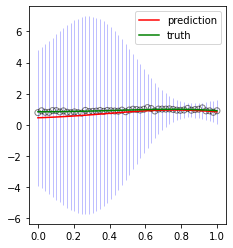

1
[17]


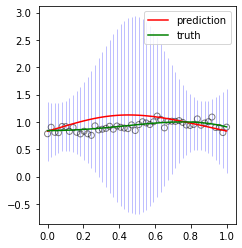

2
[17, 21]


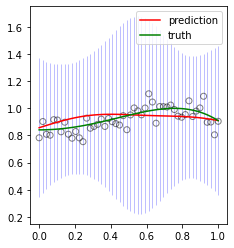

3
[17, 21, 48]


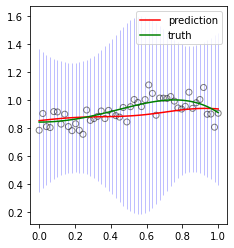

4
[17, 21, 48, 24]


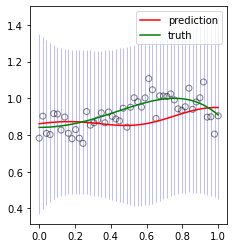

5
[17, 21, 48, 24, 2]


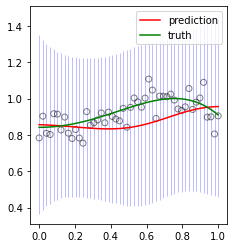

6
[17, 21, 48, 24, 2, 24]


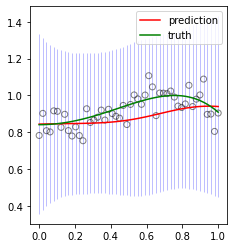

7
[17, 21, 48, 24, 2, 24, 17]


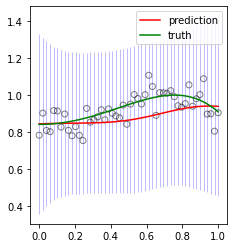

8
[17, 21, 48, 24, 2, 24, 17, 24]


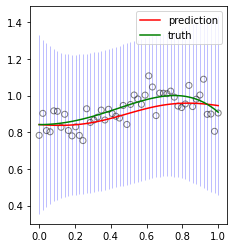

9
[17, 21, 48, 24, 2, 24, 17, 24, 6]


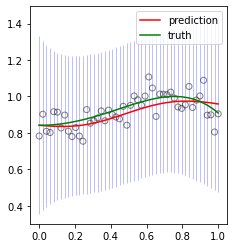

10
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26]


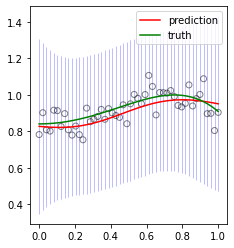

11
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35]


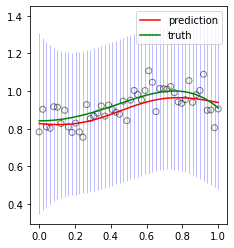

12
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47]


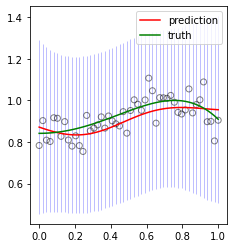

13
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33]


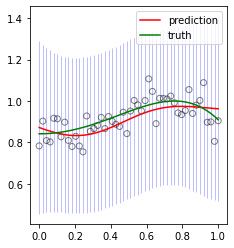

14
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35]


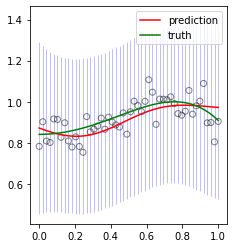

15
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39]


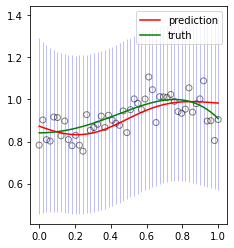

16
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22]


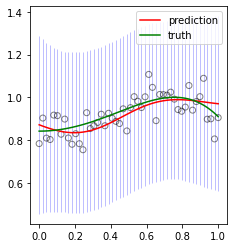

17
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14]


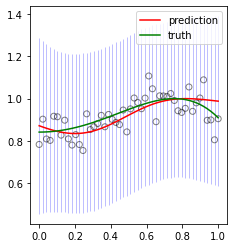

18
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39]


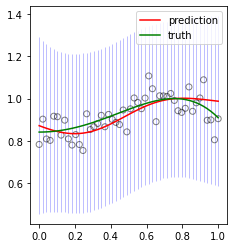

19
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14]


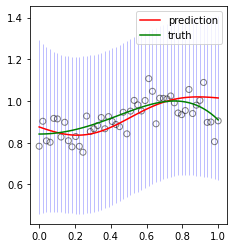

20
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25]


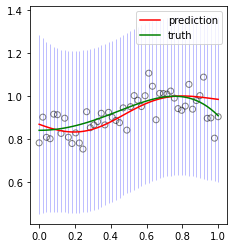

21
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10]


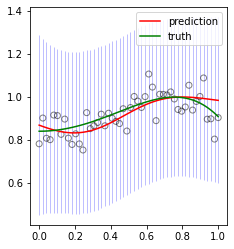

22
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44]


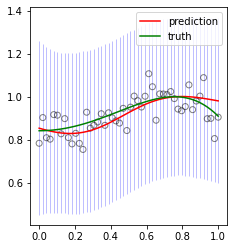

23
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42]


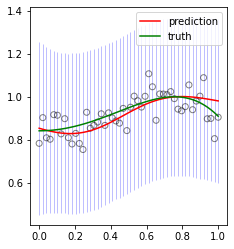

24
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30]


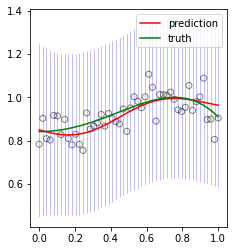

25
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7]


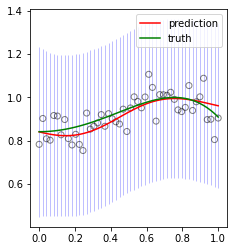

26
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10]


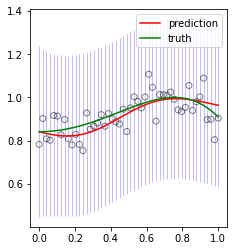

27
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27]


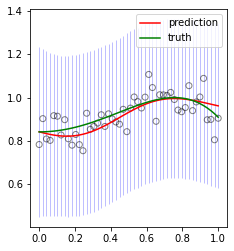

28
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29]


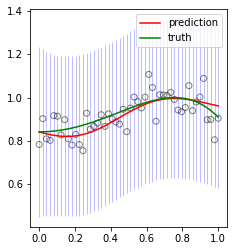

29
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34]


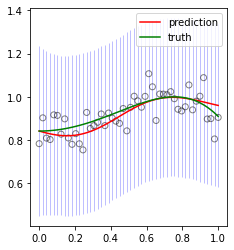

30
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20]


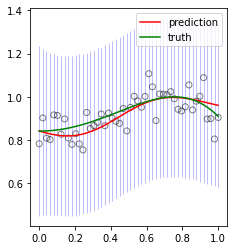

31
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29]


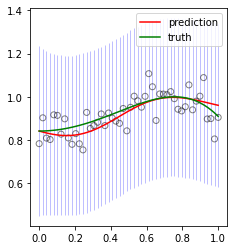

32
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5]


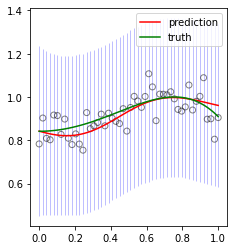

33
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24]


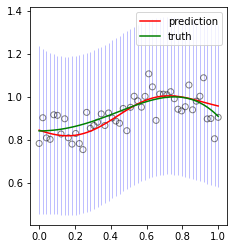

34
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2]


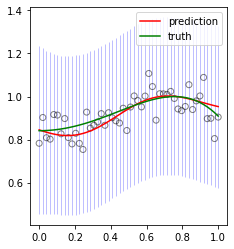

35
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28]


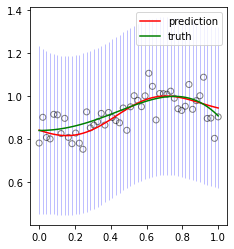

36
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46]


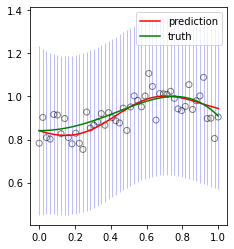

37
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43]


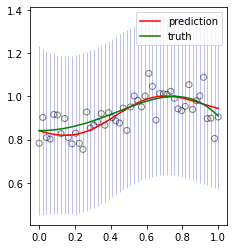

38
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38]


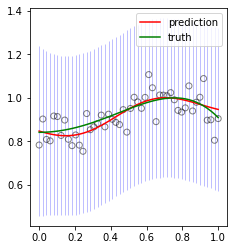

39
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13]


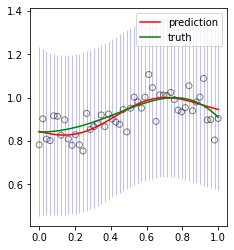

40
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47]


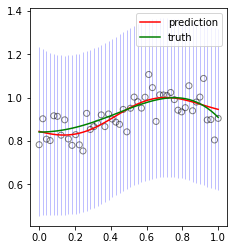

41
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45]


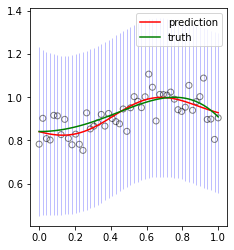

42
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26]


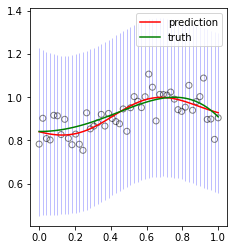

43
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0]


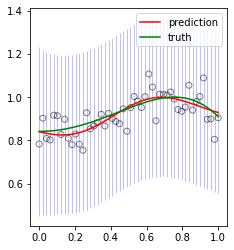

44
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10]


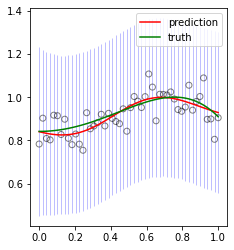

45
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7]


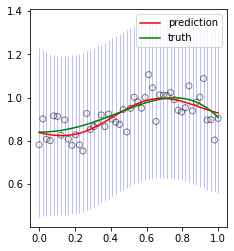

46
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7, 33]


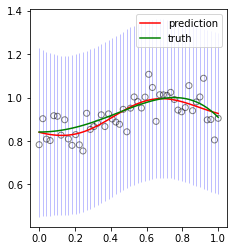

47
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7, 33, 12]


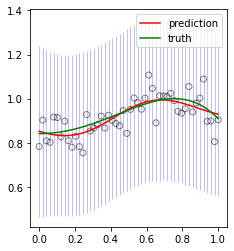

48
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7, 33, 12, 32]


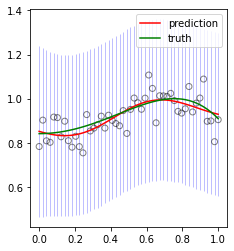

49
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7, 33, 12, 32, 17]


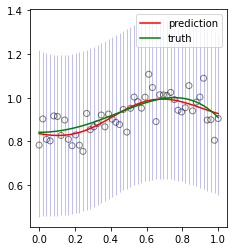

50
[17, 21, 48, 24, 2, 24, 17, 24, 6, 26, 35, 47, 33, 35, 39, 22, 14, 39, 14, 25, 10, 44, 42, 30, 7, 10, 27, 29, 34, 20, 29, 5, 24, 2, 28, 46, 43, 38, 13, 47, 45, 26, 0, 10, 7, 33, 12, 32, 17, 4]


In [45]:
import random
obs_x = []
obs_t = []
M=4
N=len(x_arr)
#N=5
X = np.linspace(0,1,50)
sigma=0.3
Phi = make_gaussian(X,s=sigma,p=M)
sigma1=0.3
beta=1/sigma1**2

alpha=0.2
m_0 = np.zeros([1,M]).T
i=[]
i1=random.sample(range(50), 50)
#i1=[11,47,25,26,7]
S_0 = 1/alpha * np.identity(M)
for n in range(1,N+1):
    
    j=int(random.choice(np.linspace(0, 49)))
    i.append(j)
    
    j=i1[n-1]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)

    # Get new data point
    x, t = Phi[[j]],y_noise[[j]]

  

    # Calculate posterior covariance and mean
    S_0_inv = np.linalg.inv(S_0)
    S_1 = np.linalg.inv(S_0_inv + beta * x.T @ x)    
    m_1 = S_1 @ (S_0_inv @ m_0 + beta * t * x.T)
    #SN = np.linalg.pinv(alpha*np.eye(M) + beta*Phi[i].T@Phi[i])
    #mN = beta*SN@Phi[i].T@y_noise[i]
    preds=Phi@m_1
    pred_var = np.sum(1/beta + Phi @ S_1 * Phi, axis=1)
    cov_mat = 1/beta +Phi@S_1@Phi.T
    lims = np.sqrt(np.diag(cov_mat))
    S_0 = S_1.copy()
    m_0 = m_1.copy()
    #diff= preds.flatten() + pred_var- preds.flatten() - pred_var
    diff=preds.flatten() - pred_var
    add=preds.flatten() + pred_var
    for k in range(0,len(x_arr)):
        plt.fill_between(x_arr, diff[k] , add[k] ,where= (x_arr == x_arr[k]), color = 'blue', alpha = 0.25,interpolate=False,step='pre')
    #plt.fill_between(x_arr, preds.flatten() - pred_var, preds.flatten() + pred_var, color = 'red', alpha = 0.25,interpolate=False,step='pre')
    #plt.stem(x_arr,preds.flatten())
    #plt.stem(x_arr,diff)
    #plt.ylim(-5,10)
    plt.plot(x_arr, preds, color ='red', label = 'prediction')
    plt.plot(x_arr, y_sin , color = 'green', label = 'truth')
    plt.scatter(x_arr,y_noise, marker =  'o', alpha = 0.5, edgecolor = 'k', facecolor ='None')
    plt.legend()
    plt.show()
    print(n)
    print(i)

From the above sequential learning plots, it can be observed that the curve is able to fit better as it learns better with the addition of data points. The predictive distribution variance also decreases with the addition of more data points sequentially, thereby indicating greater certainty in its predictions.

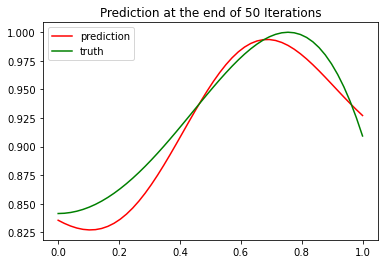

In [46]:
plt.title("Prediction at the end of 50 Iterations")
plt.plot(x_arr, preds, color ='red', label = 'prediction')
plt.plot(x_arr, y_sin , color = 'green', label = 'truth')
plt.legend()
#plt.scatter(x_arr,y_noise, marker =  'o', alpha = 0.5, edgecolor = 'k', facecolor ='None')

Q8)
i) In the case of full bayesian inference, the uncertainty SN is used to obtain the posterior probability p(w/t) whereas in the case of predictive distribution, the probability(t*/t) is calculated using the posterior distribution p(w/t) and p(t*/w) in order to obtain the correlation between the target of the test input t* and the target of train data t. 
ii) From the training data, it can be made possible to intrapolate or extrapolate the prediction of t and calculate its uncertainty which thus makes predictive distribution more beneficial as compared to the full bayesian inference. The posterior probability calculated in the full bayesian inference provides an estimate of the probable values of the parameter w and does not provide any information related to how predictions turn out using the posterior obtained. 


Q9) The probability p(t_new/t) which represents the predictive distribution, provides a probaility estimate of predicted values along with their uncertainty using the gaussian likelihood p(t*/w) and posterior distribution p(w/t). This is in turn used to infer the most probable predicted target value that is associated with the new test input provided. The probability p(w/t) on the other hand represents the posterior probablity of the parameter w given the observed data t for the input training data using the likelihood p(t/w) and the prior p(w). This posterior can then be used in order to obtain the predictive distribution for the test inputs.

## Part 4: Classification using Full Bayesian + Predictive Distribution

1) Generating the data:

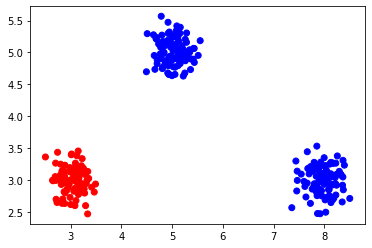

In [62]:
N1=100
N2=100
N3=100
K=2
sigma=0.05

mean=(3,3)
cov=[[sigma,0],[0,sigma]]
X1=np.random.multivariate_normal(mean,cov,N1)
c1=['red']*len(X1)


mean1=(5,5)
cov=[[sigma,0],[0,sigma]]
X2=np.random.multivariate_normal(mean1,cov,N2)
c2=['blue']*len(X2)

mean2=(8,3)
cov=[[sigma,0],[0,sigma]]
X3=np.random.multivariate_normal(mean2,cov,N3)
c3=['blue']*len(X3)

X=np.concatenate((X1,X2,X3))
color=np.concatenate((c1,c2,c3))

T=np.zeros([len(X),K])

for n in range(0,len(X)):
    if n<len(X1):
        T[n][0]=1
    if n>N1 and n<len(X1)+len(X2)+len(X3):
        T[n][1]=1
    #if n>=len(X1)+len(X2) and n<len(X1)+len(X2)+len(X3):
    #    T[n][2]=1

T=T.astype(int)        
plt.scatter(X[:,0],X[:,1],marker='o',c=color)

plt.show()





In [63]:
X=np.insert(X, 0, 1., axis=1)

Initializing the various components required to obtain the optimal parameter w:
i)The initial values of w are considered to be 0 while the variance for the prior distribution is considered to be (1/alpha)*I
ii) The target labels are concatenated together in a 1D Array where the label for class 0 inputs is taken to be 0 while the rest of the inputs belonging to class 1 are labelled as 1.

In [64]:
w=np.zeros(np.size(X, 1))
m0=w
alpha=0.05
S_0 = 1/alpha * np.identity(3)
iterations=100
labels=np.concatenate([np.zeros(100), np.ones(200)])
alpha=0.05

Iterating through Newton's method using Hessian Matrix to obtain the optimal value for w parameter:

In [65]:
for i in range(0,iterations):
    print(i)
    y=1/(1+np.exp(-X.dot(w)))
    grad=X.T.dot(y - labels) + alpha * (w-m0)
    print(grad)
    grad_prev=grad
    hessian = (X.T.dot(np.diag(y * (1 - y))).dot(X)
                           + alpha * np.identity(len(w)))
    w_prev=w
    w=w-np.linalg.inv(hessian).dot(grad)
   
    if np.all(abs(grad)<1e-8):
        print("converged")
        break
    if i == iterations - 1:
        print ("reached end of iterations")

0
[ -50.         -498.60351342 -251.02794142]
1
[ -12.54754121 -122.53112754  -61.65358449]
2
[ -4.66848991 -43.44775214 -21.80974639]
3
[ -1.85487184 -15.64212349  -7.7406801 ]
4
[-0.6953213  -5.32492549 -2.44355873]
5
[-0.21399435 -1.66227264 -0.64558553]
6
[-0.06265268 -0.49957735 -0.18401508]
7
[-0.01290414 -0.10463789 -0.03878474]
8
[-0.0009049  -0.00746884 -0.00279046]
9
[-5.32906553e-06 -4.42878831e-05 -1.66005297e-05]
10
[-1.89216531e-10 -1.57325218e-09 -5.89938182e-10]
converged


In [66]:
grad

array([-1.89216531e-10, -1.57325218e-09, -5.89938182e-10])

Calculating the prediction probability for input data

In [67]:
hessian = (X.T.dot(np.diag(y * (1 - y))).dot(X)
                   + alpha * np.identity(len(w)))
w_var=np.linalg.inv(hessian)
mu_a = X.dot(w)
var_a = np.sum(X.dot(w_var) * X, axis=1)
probs=1/(1+np.exp(-X.dot(w)))
#pred_dist=sigmoid(mu_a / np.sqrt(1 + np.pi * var_a / 8))

pred_dist=1/(1+np.exp(-(mu_a / np.sqrt(1 + np.pi * var_a / 8))))

probs1=1-probs
probs_tot=np.array([probs1,probs]).T

In [68]:
y=1/(1+np.exp(-X.dot(w)))
hessian = (X.T.dot(np.diag(y * (1 - y))).dot(X)
                   + alpha * np.identity(len(w)))
w_var=np.linalg.inv(hessian)
mu_a = X.dot(w)
var_a = np.sum(X.dot(w_var) * X, axis=1)
probs=1/(1+np.exp(-X.dot(w)))
#pred_dist=sigmoid(mu_a / np.sqrt(1 + np.pi * var_a / 8))

pred_dist=1/(1+np.exp(-(mu_a / np.sqrt(1 + np.pi * var_a / 8))))

3) Generating the probability map on test data:
i) The w parameter obtained is used to calculate prediction probabilities for the 2 dimensional test inputs provided. The probability map is then generated using the predictive distribution obtained. 

C:\Users\Varshini\AppData\Local\Temp/ipykernel_30652/1724962870.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,probs1,cmap=cmap,norm=norm)
C:\Users\Varshini\AppData\Local\Temp/ipykernel_30652/1724962870.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,1-probs1,cmap=cmap)
C:\Users\Varshini\AppData\Local\Temp/ipykernel_30652/1724962870.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the 

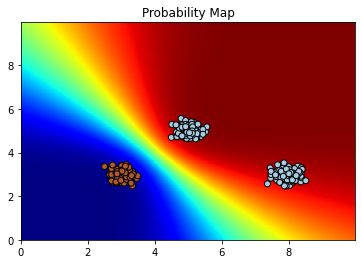

In [69]:
xx, yy = np.meshgrid(np.arange(0, 10, 0.02),
                    np.arange(0, 10, 0.02))
x_test=np.c_[np.ones(len(xx.ravel())),xx.ravel(), yy.ravel()]
w_var=np.linalg.inv(hessian)
mu_a = x_test.dot(w)
var_a = np.sum(x_test.dot(w_var) * x_test, axis=1)
probs=1/(1+np.exp(-x_test.dot(w)))
probs1=probs.reshape(xx.shape)

pred_dist=1/(1+np.exp(-(mu_a / np.sqrt(1 + np.pi * var_a / 8))))
pred_dist1=pred_dist.reshape(xx.shape)

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
levels = np.linspace(0, 1, 15)
levels = MaxNLocator(nbins=15).tick_values(0, 1)

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('jet')
norm = BoundaryNorm(levels, ncolors=cmap.N)
plt.title('Probability Map')
plt.pcolormesh(xx,yy,probs1,cmap=cmap,norm=norm)
plt.contourf(xx, yy, probs1)
#plt.colorbar()
plt.pcolormesh(xx,yy,1-probs1,cmap=cmap)
plt.pcolormesh(xx,yy,pred_dist1,cmap=cmap)

plt.scatter(X[:,1], X[:,2], c=labels, cmap='Paired_r', edgecolors='k');

plt.show()

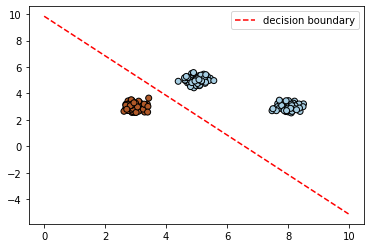

In [55]:
x_vals = np.arange(0,10,0.02)
y_vals = -(x_vals * w[1] + w[0])/w[2]
plt.plot(x_vals, y_vals, '--', c="red",label='decision boundary')
plt.scatter(X[:,1], X[:,2], c=labels, cmap='Paired_r', edgecolors='k');
plt.legend()
#plt.scatter(4,3.5)

4) Predicting custom input from user:
(Kindly enter in this format-> num1 num2)

In [70]:
x_test = list(map(float, input("\nEnter the numbers with space in between : ").strip().split()))[:2]
x_test=np.array(x_test)
x_test=np.insert(x_test,0,1)
x_test


Enter the numbers with space in between : 3 4


array([1., 3., 4.])

In [57]:
#x_test=np.array([1,4,4])

In [71]:
w_var=np.linalg.inv(hessian)
mu_a = x_test.dot(w)
var_a = np.dot(x_test.dot(w_var) , x_test)
pred_prob=1/(1+np.exp(-x_test.dot(w)))
#probs1=probs.reshape(xx.shape)

pred_dist=1/(1+np.exp(-(mu_a / np.sqrt(1 + np.pi * var_a / 8))))
pred_prob

0.09800526425199257

In [72]:
if pred_prob>0.5:
    print("Given point belongs to C2")
    print("\nCertainty= ",pred_prob)
    print("\nUncertainty= ",1-pred_prob)
else:
    print("Given point belongs to C1")
    print("\nCertainty= ",1-pred_prob)
    print("\nUncertainty= ",pred_prob)

Given point belongs to C1

Certainty=  0.9019947357480074

Uncertainty=  0.09800526425199257
